In [22]:
import os
import pickle
import numpy as np
import pandas as pd
import nest_asyncio
from datasets import Dataset
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from langchain_groq import ChatGroq
from ragas import evaluate, RunConfig
from ragas.metrics import faithfulness
from langchain_huggingface import HuggingFaceEmbeddings
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    answer_similarity,
    answer_correctness,
)

load_dotenv()

api_key = os.getenv('GROQ_API_KEY')

models = ['llama3-70b-8192', 'llama3-8b-8192', 'mixtral-8x7b-32768', 'gemma-7b-it', 'gemma2-9b-it']
metrics = [answer_relevancy, faithfulness, answer_similarity, answer_correctness]

In [23]:
llm = ChatGroq(groq_api_key=api_key, model_name="llama3-8b-8192", temperature=0)

In [24]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [25]:
scores_dict = {'model': []}
for metric in metrics:
    scores_dict[metric.name] = []

nest_asyncio.apply()

for model in models:
    with open(f'data/{model}.pkl', 'rb') as pickle_file:
        loaded_data_samples = pickle.load(pickle_file)

    scores_dict['model'].append(model)
    for metric in metrics:
        dataset = Dataset.from_dict(loaded_data_samples)
        score = evaluate(dataset, metrics=[metric], llm = llm, embeddings = embeddings, run_config = RunConfig(timeout=180, max_retries=20, max_wait=120, max_workers=16))

        scores_dict[metric.name].append(np.round(score[metric.name], 3))

scores_df = pd.DataFrame(scores_dict)

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

ERROR:ragas.executor:Exception raised in Job[4]: TimeoutError()


Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

In [26]:
scores_df.head()

,model,answer_relevancy,faithfulness,answer_similarity,answer_correctness
0,llama3-70b-8192,0.890,0.550,0.713,0.638
1,llama3-8b-8192,0.750,0.517,0.605,0.516
2,mixtral-8x7b-32768,0.885,0.455,0.704,0.613
3,gemma-7b-it,0.157,0.325,0.595,0.545
4,gemma2-9b-it,0.407,0.700,0.514,0.466


In [27]:
scores_df.set_index('model', inplace=True)

In [28]:
scores_df.head()

,answer_relevancy,faithfulness,answer_similarity,answer_correctness
model,,,,
llama3-70b-8192,0.890,0.550,0.713,0.638
llama3-8b-8192,0.750,0.517,0.605,0.516
mixtral-8x7b-32768,0.885,0.455,0.704,0.613
gemma-7b-it,0.157,0.325,0.595,0.545
gemma2-9b-it,0.407,0.700,0.514,0.466


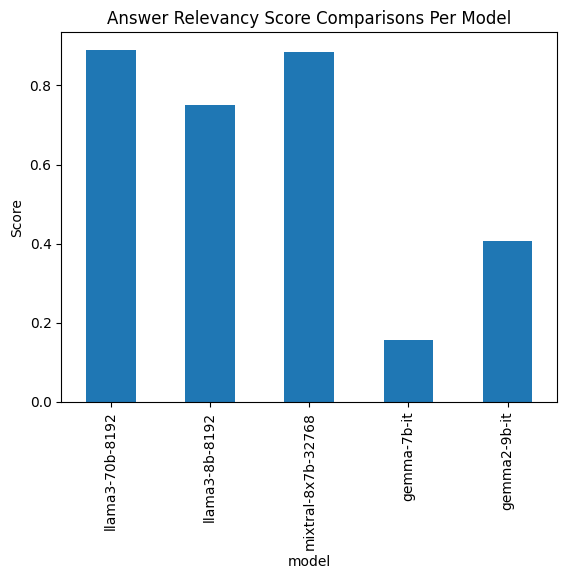

In [29]:
scores_df['answer_relevancy'].plot(kind='bar')
plt.title('Answer Relevancy Score Comparisons Per Model')
plt.ylabel('Score')
plt.show()

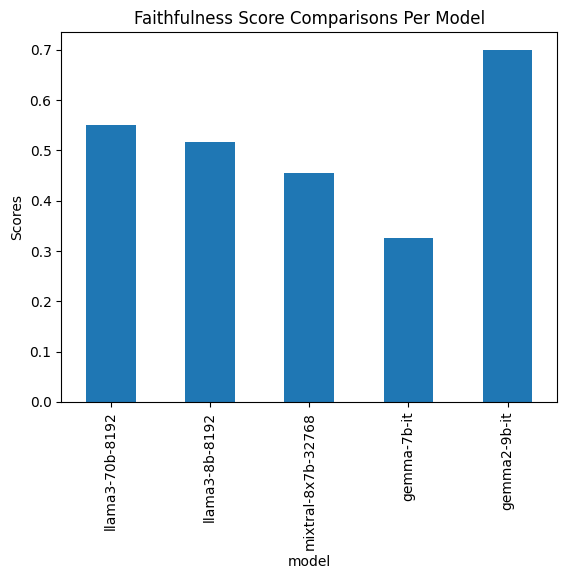

In [30]:
scores_df['faithfulness'].plot(kind='bar')
plt.title('Faithfulness Score Comparisons Per Model')
plt.ylabel('Scores')
plt.show()

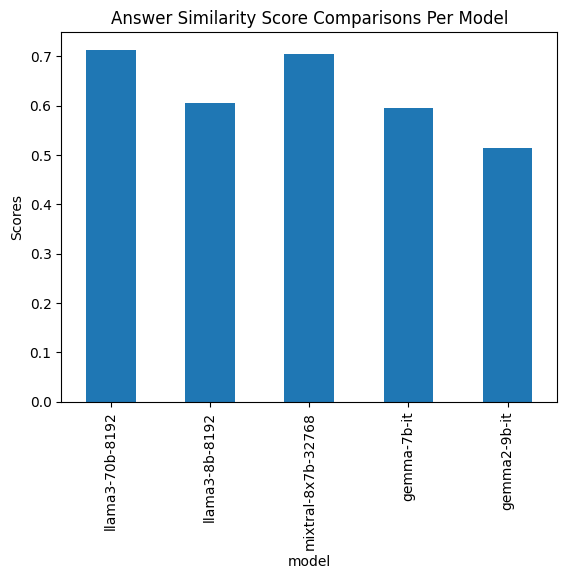

In [31]:
scores_df['answer_similarity'].plot(kind='bar')
plt.title('Answer Similarity Score Comparisons Per Model')
plt.ylabel('Scores')
plt.show()

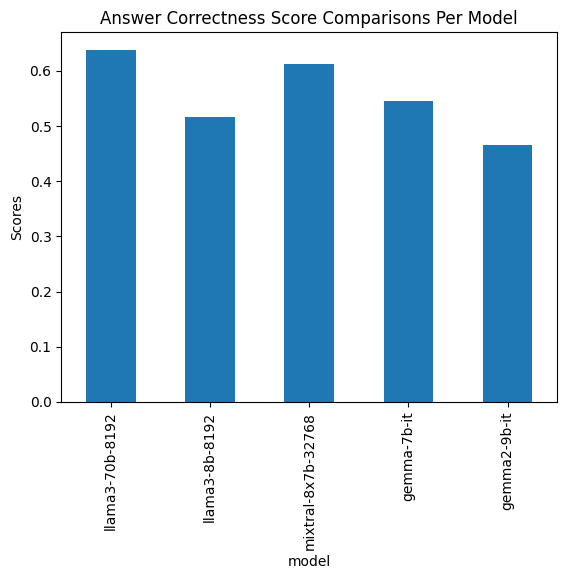

In [32]:
scores_df['answer_correctness'].plot(kind='bar')
plt.title('Answer Correctness Score Comparisons Per Model')
plt.ylabel('Scores')
plt.show()